In [2]:
from os import walk
import numpy as np
import matplotlib.pyplot as plt

In [7]:
steps2wavelength = np.poly1d([1.12987172e-12, -1.52231129e-08,  3.03652976e-03,  4.60902951e+02])

In [8]:
path = 'data/Glühlampenspektrum/'
filenames = next(walk(path))[2]
data = {}
maximum_inten= 0.0
for filename in filenames:
    data[filename] = np.loadtxt(path + filename)
    maximum_inten = np.max([maximum_inten, np.max(data[filename][:,1])])


528.9273306656492
525.2660058666175
527.4895577449654


C:\Users\hchr\AppData\Local\Temp\ipykernel_17720\722734057.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([None, 0, None, None, None, None, 1])


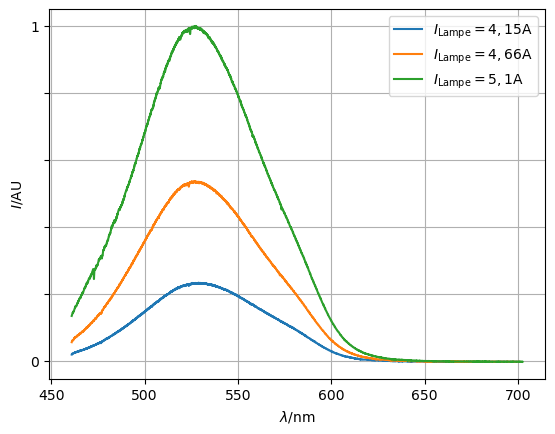

In [12]:
fig, ax = plt.subplots()

for key in data:
    wavelengths = steps2wavelength(data[key][:,0])
    intensity = data[key][:,1] / maximum_inten
    ax.plot(wavelengths, intensity, label=f"$I_\\mathrm{{Lampe}} = {key} \\mathrm{{A}}$")
    peak = wavelengths[np.argmax(intensity)]
    print(peak)
    #ax.axvline(peak, c='k', linewidth=0.5)

ax.grid()
ax.set(xlabel="$\\lambda / \\mathrm{nm}$", ylabel="$I / \\mathrm{AU}$")
ax.set_yticklabels([None, 0, None, None, None, None, 1])
ax.legend()

fig.savefig("out/spektrum_gluehlampe.svg")